In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gc
import cPickle as pickle
import fastparquet

In [8]:
import cPickle as pickle

In [3]:
data=fastparquet.ParquetFile("../input/train_test.parq").to_pandas()

In [4]:
def nancorr2(a,b):
    idx0=(~np.isnan(a))
    idx=idx0 & (~np.isnan(b))
    a=a[idx].flatten().astype(np.float64);b=b[idx].flatten().astype(np.float64)
    return np.corrcoef(a,b)[0,1],idx.sum()/float(idx0.sum())
def lag_v(v,lag=1): #assume v is same order as data
    tmpdf=data[['air_store_id','visit_date']].copy()
    tmpdf2=tmpdf.copy()
    tmpdf2['v']=v
    tmpdf2['visit_date']=tmpdf2['visit_date']+lag
    df=pd.merge(tmpdf,tmpdf2,how="left",on=['air_store_id','visit_date'])
    return df['v'].values
    
def lag_y(lag=1):
    return lag_v(data['visitors'].values,lag=lag)
def ma(period=3):
    s=0
    sd=0.0
    for i in range(period):
        a=lag_y(i)
        ind=np.isnan(a)
        sd+= ~ind
        a[ind]=0
        s+=a
    return s/sd
def lag_ma(lag=1,period=3):
    return lag_v(ma(period=period),lag=lag)
def season_ma(period=3):
    s=0
    sd=0.0
    for i in range(period):
        a=lag_y(i*7)
        ind=np.isnan(a)
        sd+= ~ind
        a[ind]=0
        s+=a
    return s/sd
def lag_season_ma(lag=1,period=3):
    return lag_v(season_ma(period=period),lag=lag*7)

In [5]:
pd.to_datetime('2017-4-23')-pd.to_datetime('2017-5-31')

Timedelta('-38 days +00:00:00')

In [6]:
columns=[u'visitors', 'geo1_visitors_mean', 'geo2_visitors_mean', 'station_visitors_mean', 
         'genre_name_visitors_mean', 'day_of_week_visitors_mean',
         u'TMAX', u'TMIN', u'TAVG', u'PRCP', u'holiday']

In [7]:
data.head()

air_store_id  visit_date  visitors   geo1  geo1_store_count  \
index                                                                
0                 0           0       NaN  Tōkyō               444   
1                 0           1       NaN  Tōkyō               444   
2                 0           2       NaN  Tōkyō               444   
3                 0           3       NaN  Tōkyō               444   
4                 0           4       NaN  Tōkyō               444   

       geo1_visitors_count  geo1_visitors_mean     geo2  geo2_store_count  \
index                                                                       
0                       20            2.620946  Chiyoda                22   
1                       18            2.811538  Chiyoda                22   
2                       27            3.030371  Chiyoda                22   
3                       68            2.735346  Chiyoda                22   
4                      114            2.639541  Chiyoda                22   

       geo2_visitors_count   ...          TMAX TMIN  TAVG  PRCP  day_of_week  \
index                        ...                                               
0                        1   ...     12.100000  2.6   7.3   NaN       Friday   
1                        1   ...     13.400000  2.6   7.4   NaN     Saturday   
2                        1   ...     16.200001  3.0   9.8   NaN       Sunday   
3                        3   ...     15.200000  4.4   9.9   NaN       Monday   
4                        6   ...     15.400000  5.1  10.8   NaN      Tuesday   

      day_of_week_store_count  day_of_week_visitors_count  \
index                                                       
0                         829                          48   
1                         829                          63   
2                         829                          81   
3                         829                         157   
4                         829                         231   

       day_of_week_visitors_mean  holiday  is_rain  
index                                               
0                       2.632437      1.0      0.0  
1                       3.077320      1.0      0.0  
2                       3.091436      1.0      0.0  
3                       2.829584      0.0      0.0  
4                       2.639654      0.0      0.0  

[5 rows x 29 columns]

In [10]:
len(set(data['air_store_id'])),len(set(data['visit_date'])),data['visit_date'].max()

(829, 517, 516)

In [12]:
data.shape,829*517

((428593, 29), 428593)

In [39]:
lst=[]
for u in set(data['air_store_id']):
    a=data[data['air_store_id']==u][['visit_date','visitors']].set_index('visit_date').sort_index()
    a['visitors']=~a['visitors'].isnull()
    s=a['visitors'].values
    i=np.where(s)[0][0]
    b= 1.0*s[i:].sum()/max(1,(len(s[i:])-39))
    lst.append(b)

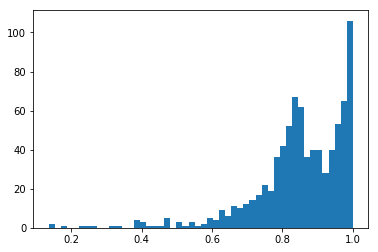

In [40]:
plt.hist(lst,bins=50);

In [41]:
lst=[]
for u in set(data['air_store_id']):
    a=data[data['air_store_id']==u][['visit_date','visitors']].set_index('visit_date').sort_index()
    a['visitors']=~a['visitors'].isnull()
    s=a['visitors'].values
    i=np.where(s)[0][0]
    j=np.where(s)[0][-1]
    b= 1.0*s[i:j+1].sum()/max(1,(len(s[i:j+1])))
    lst.append(b)

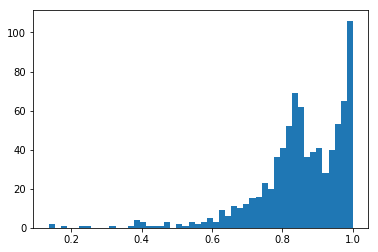

In [42]:
plt.hist(lst,bins=50);